In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
# Get list of files
list_of_files = glob.glob('./*.csv')
files = []
# Get 4 newest files
for i in range(4):
    latest_file = max(list_of_files, key=os.path.getctime)
    files.append(latest_file)
    list_of_files.remove(latest_file)
'''
for i in range(4):
    files.remove(files[4])
# '''
for f in files:
    print(f)

./history_mlp_500_200-150-120_7x7_1e-05_rot_ellipse_nfp_cut_dshift1_shift1_bia_int2_ned_ncl_usm_a0.01_s1_fkernel.csv
./history_mlp_500_200-150-120_7x7_1e-05_rot_ellipse_nfp_cut_dshift1_shift1_bia_int2_ned_ncl_usm_a0.01_s3_fkernel.csv
./history_mlp_500_200-150-120_7x7_1e-05_rot_ellipse_nfp_cut_dshift1_shift1_bia_int2_ned_ncl_usm_a0.01_s2_fkernel.csv
./history_mlp_500_200-150-120_7x7_1e-05_rot_ellipse_nfp_cut_dshift1_shift1_bia_int2_ned_ncl_usm_a0.01_s4_fkernel.csv


In [3]:
data = pd.read_csv(f'history_mlp_1000_200-150-120_7x7_rot_ellipse_flp_cut_dshift1_shift1_bia_int1_edg_ncl_g_s1_neuEdge.csv')
print(list(data.columns))

['epoch', 'loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse']


./history_mlp_500_200-150-120_7x7_1e-05_rot_ellipse_nfp_cut_dshift1_shift1_bia_int2_ned_ncl_usm_a0.01_s1_fkernel.csv:	1.31E-04	1.27E-04
./history_mlp_500_200-150-120_7x7_1e-05_rot_ellipse_nfp_cut_dshift1_shift1_bia_int2_ned_ncl_usm_a0.01_s3_fkernel.csv:	1.33E-04	1.28E-04
./history_mlp_500_200-150-120_7x7_1e-05_rot_ellipse_nfp_cut_dshift1_shift1_bia_int2_ned_ncl_usm_a0.01_s2_fkernel.csv:	1.33E-04	1.28E-04
./history_mlp_500_200-150-120_7x7_1e-05_rot_ellipse_nfp_cut_dshift1_shift1_bia_int2_ned_ncl_usm_a0.01_s4_fkernel.csv:	1.33E-04	1.29E-04


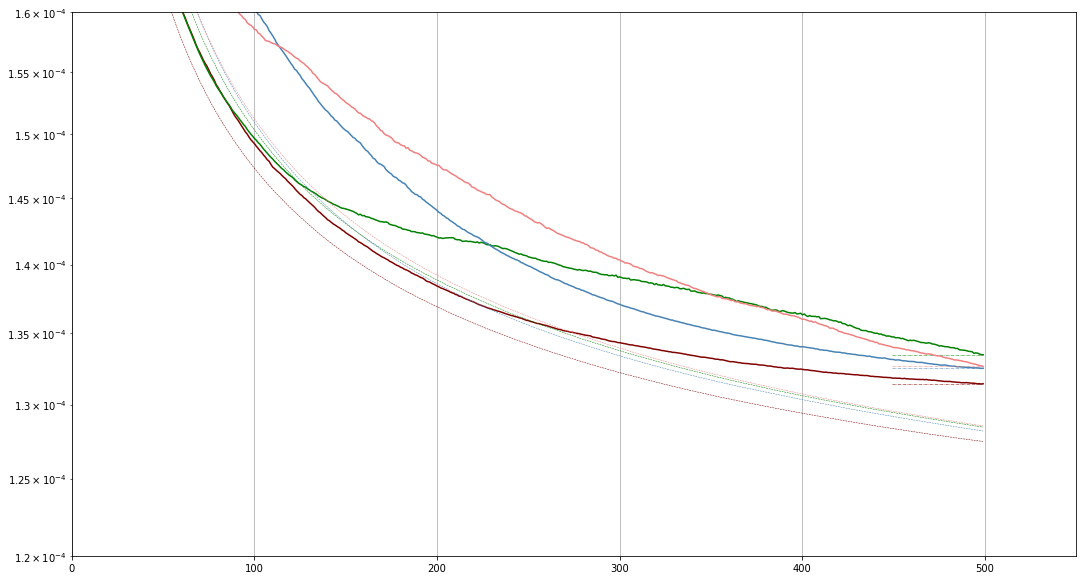

In [14]:
fig, ax = plt.subplots(figsize = (18, 10))
# reds = iter(['maroon', 'green', 'steelblue', 'lightcoral', 'cyan', 'darkviolet', 'indigo', 'chocolate'])
reds = ['maroon', 'green', 'steelblue', 'lightcoral', 'cyan', 'darkviolet', 'indigo', 'chocolate']
# '''
x_max = 0
for f in files:
    data = pd.read_csv(f)
    x_max = (max(x_max, data.shape[0]) if files.index(f) < 4 else x_max)
    # color = next(reds)
    color = reds[files.index(f)%4]
    alpha = (1 if files.index(f) < 4 else 0.2)
    data['val_loss'].plot(color=color, label=f, alpha=alpha)
    data['loss'].plot(ls='--', color=color, lw=0.5, alpha=alpha)
    lowest_value = min(data['val_loss'])
    lowest_loss = min(data['loss'])
    print(f'{f}:\t{lowest_value:.2E}\t{lowest_loss:.2E}')
    plt.plot([max(0, data['loss'].shape[0]-51), data['loss'].shape[0]-1], [lowest_value, lowest_value], color=color, ls='-.', lw=0.5)
# plt.legend()
ax.set_yscale('log')
# ax.set_ylim([1e-4, 1e-3])
# ax.set_ylim([1.5e-4, 2e-4])
ax.set_ylim([1.2e-4, 1.6e-4])
ax.set_xlim([0, x_max*1.1])
plt.grid()
plt.show()